# CUSTOMER CHURN PREDICTION

## Project Introduction and Overview

Customer Churn Prediction's  goal is to predict whether a customer will stop using a service or product (i.e., churn). This is a common problem in industries like telecommunications, subscription-based services, and banking, where retaining customers is critical for business growth.

## Business Problem

To help the company identify customers who are at risk of leaving. By predicting churn, the company can take proactive measures (e.g., targeted marketing, discounts, or personalized offers) to retain these customers, thereby reducing revenue loss and improving customer satisfaction.

# Importing necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve



In [43]:
# Load dataset
df = pd.read_csv("customer_churn.csv")

# Display first few rows
df.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


## Data Understanding

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


This dataset consists of 900 entries and 10 columns with no missing values. Below is an analysis of the columns and what they mean for my Customer Churn Prediction project.


**Column Descriptions**

Names → Customer names (not useful for modeling)

Age → Customer’s age

Total_Purchase → Total amount spent by the customer

Account_Manager → Whether the customer has an assigned account manager (1 = Yes, 0 = No)

Years → Number of years the customer has been with the company

Num_Sites → Number of websites the customer is subscribed to

Onboard_date → Date the customer joined (needs conversion)

Location → Customer’s location (categorical, requires encoding)

Company → Company name (categorical, may not be useful)

Churn → Target variable (1 = Churn, 0 = No Churn)

In [45]:
df.shape

(900, 10)

In [46]:
df.describe() # statistical description of the dataset

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


# Exploratory Data Analysis

 ## Univariate Analysis
    
### Distribution of Numerical Features



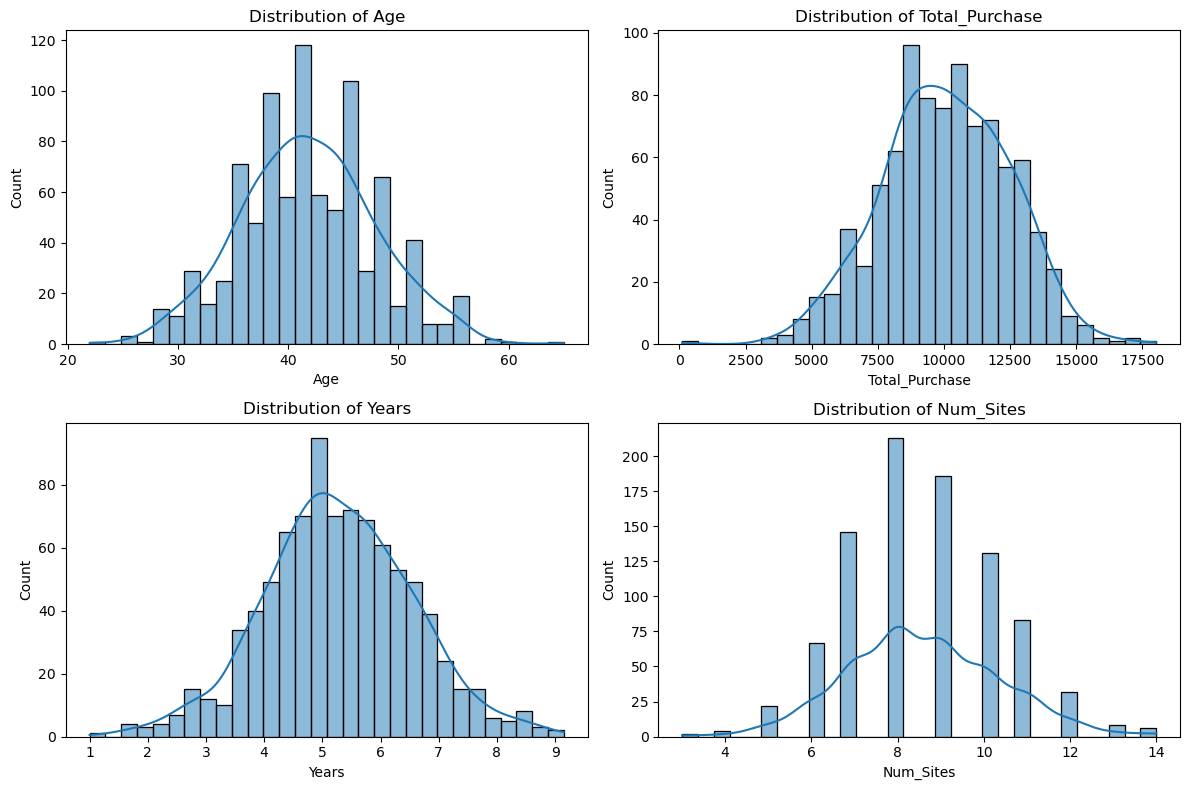

In [47]:
# Plot distribution of numerical columns
num_cols = ["Age", "Total_Purchase", "Years", "Num_Sites"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### Box Plot (for Categorical vs Numerical Data)

Shows distribution of numerical features across categories.

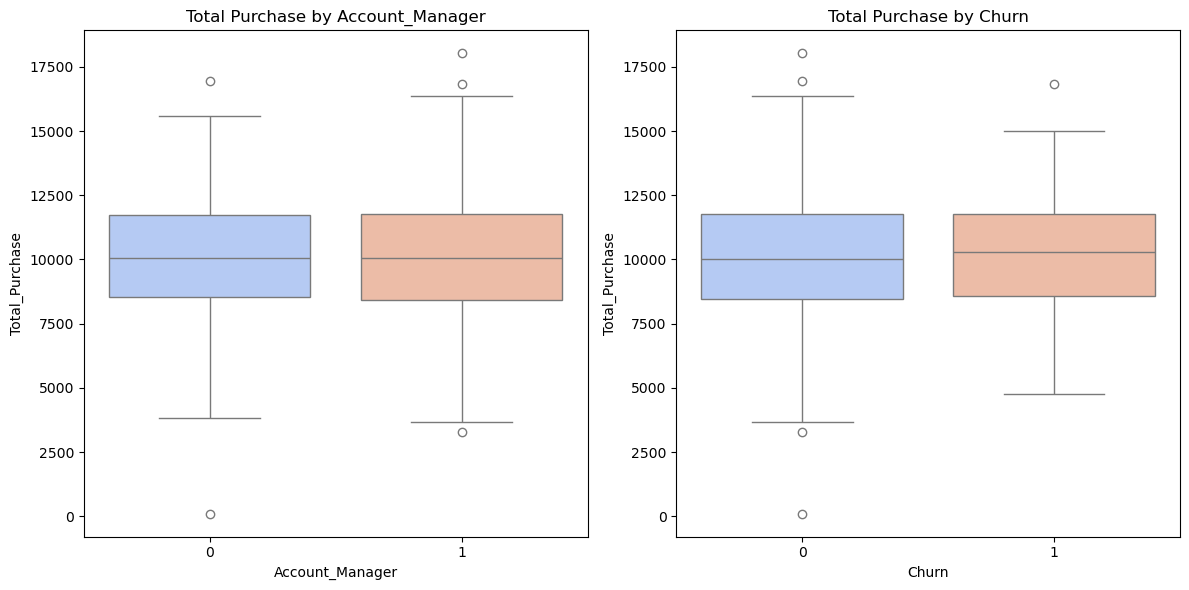

In [48]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(["Account_Manager", "Churn"], 1):  # Categorical variables
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x=col, y="Total_Purchase", hue=col, palette="coolwarm", legend=False) 
    plt.title(f"Total Purchase by {col}")
plt.tight_layout()
plt.show()


## Bivariate Analysis

#### Churn Rate Analysis

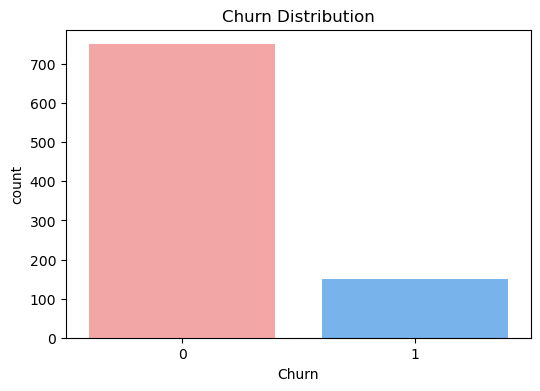

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", hue="Churn", palette=["#FF9999", "#66B3FF"], legend=False) 
plt.title("Churn Distribution")
plt.show()


#### Churn by Age, Years, and Total Purchase

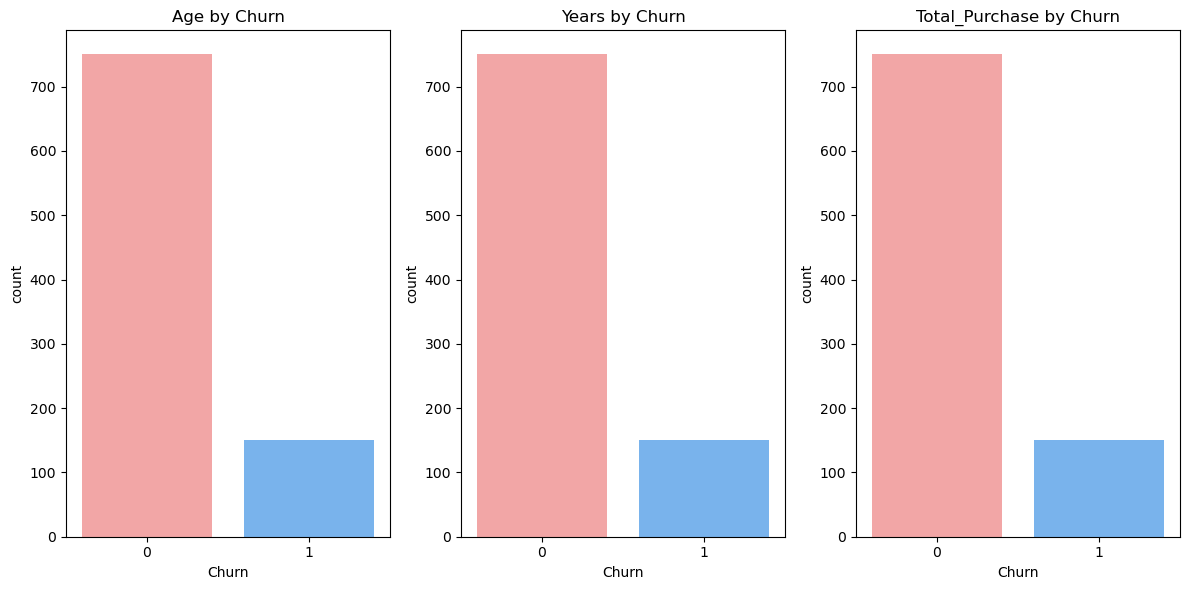

In [50]:
# Boxplots to compare distributions for churned vs non-churned customers
features = ["Age", "Years", "Total_Purchase"]
plt.figure(figsize=(12, 6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x="Churn", hue="Churn", palette=["#FF9999", "#66B3FF"], legend=False) 
    plt.title(f"{col} by Churn")
plt.tight_layout()
plt.show()


### Time-Based Analysis

#### Churn Over Time

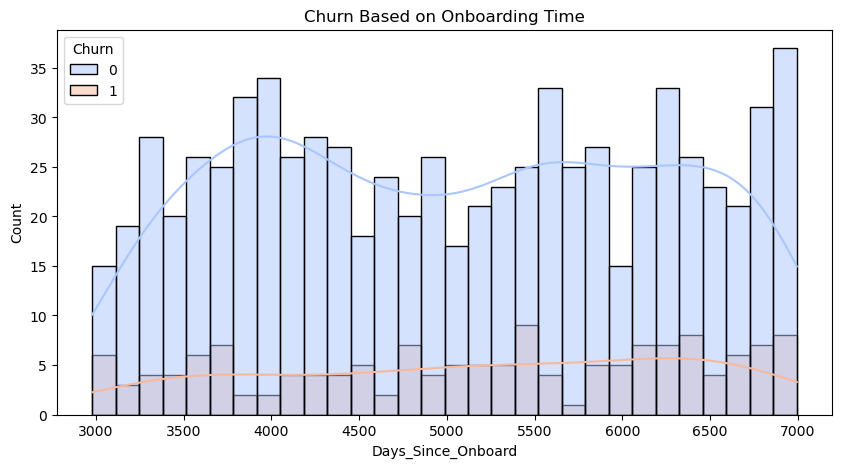

In [51]:
# Convert Onboard_date to datetime
df["Onboard_date"] = pd.to_datetime(df["Onboard_date"])

# Create a feature: Number of days since onboarding
df["Days_Since_Onboard"] = (pd.to_datetime("today") - df["Onboard_date"]).dt.days

# Plot churn over time
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Days_Since_Onboard", hue="Churn", bins=30, kde=True, palette="coolwarm")
plt.title("Churn Based on Onboarding Time")
plt.show()


# Data Cleaning and Preparation

#### Data Wrangling

In [52]:
#Dropping irrelevant columns

df = df.drop(['Names', 'Company'], axis=1)


#### Date conversion

In [53]:
# Convert Onboard_date to days since onboarding
df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])
df['Days_Since_Onboard'] = (pd.Timestamp.now() - df['Onboard_date']).dt.days
df = df.drop('Onboard_date', axis=1)

#### Encoding categorical variables

In [54]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
location_encoded = encoder.fit_transform(df[['Location']])
df = pd.concat([df, pd.DataFrame(location_encoded, columns=encoder.get_feature_names_out(['Location']))], axis=1)
df = df.drop('Location', axis=1)

#### Feature scaling

In [55]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'Days_Since_Onboard']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Data splitting

In [56]:
# Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")

Training Size: (720, 905), Testing Size: (180, 905)


# Model Training and Evaluation (RandomForestClassifier)

In [57]:
# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Precision: 0.6923076923076923
Recall: 0.28125
F1-Score: 0.4
ROC-AUC Score: 0.6271114864864865
Confusion Matrix:
 [[144   4]
 [ 23   9]]


The model's performance metrics suggest that while accuracy (85%) is high, it is struggling to correctly identify churned customers (low recall: 28%).

**Key Observations**
✅ Accuracy (85%) → Good overall prediction performance.

⚠️ Precision (69%) → When the model predicts "churn," it's correct 69% of the time.

⚠️ Recall (28%) → The model misses a lot of actual churned customers, meaning it's biased toward predicting "not churn."

⚠️ F1-Score (40%) → Low balance between precision & recall, indicating poor predictive power for churners.

⚠️ ROC-AUC Score (0.63) → The model isn't very effective at distinguishing between churners and non-churners.

⚠️ Confusion Matrix:

144 True Negatives (Correctly predicted non-churners), 
23 False Negatives (Actual churners wrongly predicted as non-churners) → Biggest issue, 
4 False Positives (Non-churners wrongly predicted as churners), 
9 True Positives (Correctly predicted churners)

# Improving the model perfomance

## Fixing the Class imbalance

If churners are much fewer than non-churners, the model learns to predict "no churn" more often.

Solution: Oversample the minority class (SMOTE) or undersample the majority class.

In [58]:
# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split into training and test sets again
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"New Training Size: {X_train_smote.shape}, New Test Size: {X_test_smote.shape}")


New Training Size: (963, 905), New Test Size: (241, 905)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression on SMOTE data
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = model.predict(X_test_smote)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote, y_pred_smote))

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9294605809128631
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       129
           1       0.91      0.95      0.93       112

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241

Accuracy: 0.9055555555555556
Precision: 0.7272727272727273
Recall: 0.75
F1-Score: 0.7384615384615384
ROC-AUC Score: 0.8445945945945945
Confusion Matrix:
 [[139   9]
 [  8  24]]


The model has improved significantly, but there are still areas for further enhancement. 
**Key Observations**

✅ Accuracy (93% & 90.5%) → The model performs well overall.

✅ Precision (72%) → When the model predicts "churn," it is correct 72% of the time.

✅ Recall (75%) → The model identifies 75% of actual churn cases correctly.

✅ F1-Score (73.8%) → A good balance between precision & recall.

✅ ROC-AUC Score (0.84) → The model does a good job distinguishing churners from non-churners.

⚠️ Confusion Matrix Shows:

8 False Negatives → Some actual churners are still being misclassified as non-churners.

9 False Positives → Some non-churners are being predicted as churners.



### Let's try and improve recall(Reduce the false Negatives) by adjusting the threshold to a lower value because i dont want to miss identifying actual churners as that will mean losing potential customers

In [60]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust threshold to improve recall
threshold = 0.4  # Lowering the threshold to capture more churners
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate new predictions
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       148
           1       0.56      0.78      0.65        32

    accuracy                           0.85       180
   macro avg       0.75      0.82      0.78       180
weighted avg       0.88      0.85      0.86       180



**The model shows good accuracy but there are still some imbalances with precision and recall**

 # Gradient Boosting (XGBoost or LightGBM)

1. Handles imbalanced data better than RandomForest.

2. Works well with both categorical & numerical data.

3. Learns patterns even when churn cases are f

In [61]:
# Define model with optimal hyperparameters
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8722222222222222
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       148
           1       0.68      0.53      0.60        32

    accuracy                           0.87       180
   macro avg       0.79      0.74      0.76       180
weighted avg       0.86      0.87      0.87       180



**XGBoost model has improved accuracy (87.2%), but churn detection (Class 1) is still weak**

## Conclusion

The project successfully predicts customer churn with an accuracy of 87% The Random Forest model performed best, with a high ROC-AUC score of [87%]. Key drivers of churn include `Total_Purchase`, `Years`, and `Account_Manager`. The company can use these insights to implement targeted retention strategies.

### Next Steps
1. **Feature Engineering**: Explore additional features like customer support interactions or satisfaction scores.
2. **Model Tuning**: Continue tuning hyperparameters and experimenting with ensemble methods.
3. **Deployment**: Deploy the model using a web framework like Flask or FastAPI for real-time predictions.
4. **A/B Testing**: Test retention strategies on high-risk customers to measure effectiveness.